In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Dropout,LSTM, Bidirectional
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import torch
from torch.nn import Transformer
from sklearn.preprocessing import StandardScaler #good
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from sklearn import metrics #accuracy measure
import joblib
import warnings

In [2]:
training_set=os.listdir("./training_set_df_acc/")
df=None
for data in training_set:
    if data.endswith('.csv'):
        file=f"./training_set_df_acc/{data}"
        if df is None:
            df=pd.read_csv(file)
        else:
            d=pd.read_csv(file)
            df=pd.concat([df,d])


In [3]:
df=df.astype(float)
df['label']=df['label'].astype(int)
df['label']=df['label'].astype("category")

In [4]:
test=pd.read_csv('./test_set_df_acc/S08T1.csv')


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 30192 entries, 0 to 185
Data columns (total 2998 columns):
 #     Column                                              Dtype   
---    ------                                              -----   
 0     left_elbow_shoulder_hip mean_ft                     float64 
 1     left_elbow_shoulder_hip std_ft                      float64 
 2     left_elbow_shoulder_hip max_ft                      float64 
 3     left_elbow_shoulder_hip min_ft                      float64 
 4     left_elbow_shoulder_hip var_ft                      float64 
 5     left_elbow_shoulder_hip med_ft                      float64 
 6     left_elbow_shoulder_hip sum_ft                      float64 
 7     left_elbow_shoulder_hip std                         float64 
 8     left_elbow_shoulder_hip kurtosis                    float64 
 9     left_elbow_shoulder_hip skew                        float64 
 10    left_elbow_shoulder_hip quantile 25                 float64 
 11    left_

/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/khangphan/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='label', ylabel='Count'>

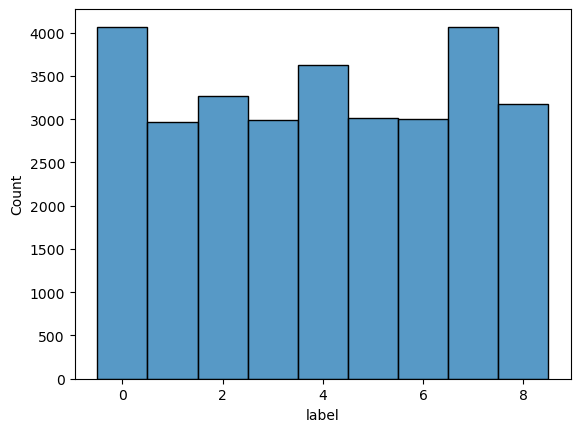

In [6]:
sns.histplot(df["label"])

In [7]:
X=df.drop(["label","previous_label"],axis=1)
y=df['label']

In [8]:
X.shape

(30192, 2996)

In [9]:
y.shape

(30192,)

In [10]:
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(X_train,y_train)
# # filename = './xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [11]:
# from sklearn.ensemble import RandomForestClassifier #Random Forest
# rf=RandomForestClassifier(random_state=10)
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [12]:
# import joblib
# filename = './xgb_model.sav'
# joblib.dump(xgbcl, filename)

In [13]:
# from sklearn.svm import SVC
# svc=SVC()
# svc.fit(X_train,y_train)
# pred=svc.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [14]:
# from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
# knn = RadiusNeighborsClassifier(radius=175)
# knn.fit(X_train,y_train)
# pred=knn.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [15]:
# from sklearn.linear_model import SGDClassifier
## sgd=SGDClassifier()loss='epsilon_insensitive'
# sgd.fit(X_train,y_train)
# pred=sgd.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [16]:
from sklearn.feature_selection import SelectKBest,f_regression
# Applying SelectKBest class to extract top 15 best features
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X,y)
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(300,columns="F_Score"))
# dfi.export(feature_score.nlargest(16,columns="F_Score"),'./image/fulltest/f_test.png')
# feature_score.nlargest(300,columns="F_Score")['Input_Features'].values

                                Input_Features      F_Score
280                       left_elbow_x mean_ft  1279.437132
286                        left_elbow_x sum_ft  1257.488789
285                        left_elbow_x med_ft  1239.348144
292                           left_elbow_x RMS  1229.443200
2891  movingright_shoulder right_wrist_ dx std  1176.610338
...                                        ...          ...
118                          left_eye_x sum_ft   574.336710
2661  movingright_shoulder left_eye_ dx std_ft   572.211560
125                             left_eye_x MAV   567.016344
360                   left_wrist_y quantile 25   566.897101
2765     movingright_shoulder right_ear dy std   566.748808

[300 rows x 2 columns]


In [17]:
X_train=X#[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_train=y
X_test=test.drop(["label","previous_label"],axis=1)
# X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
y_test=test['label']


In [18]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier #Random Forest
# try:
# oversampling the train dataset using SMOTE

sm = SMOTE()
all_feature_smote, all_label_smote = sm.fit_resample(X_train,y_train)
# rf=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf.fit(all_feature_smote, all_label_smote)
# # filename = './model/smote_rf_model.sav'
# # rf=joblib.load(filename)
# pred_rf=rf.predict(X_test)

# print(metrics.classification_report(pred_rf,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf,y_test, normalize='true')
# sns.heatmap(conf,annot=True)



In [19]:
# filename = './model/smote_rf_model2.sav'
# joblib.dump(rf, filename)

# XGB

In [20]:
from xgboost import XGBClassifier#XGBcalssifier
# from xgboost.callback import EarlyStopping
# early_stop = EarlyStopping(
#     rounds=4, metric_name='mlogloss', save_best=True
# )
# xgbcl=XGBClassifier( eval_metric='mlogloss', random_state=10,callbacks=[early_stop])
# xgbcl.fit(all_feature_smote, all_label_smote,eval_set=[(X_test, y_test)])
# # filename = './model/smote_xgb_model.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [21]:
# X_train_with_predictions.shape

In [22]:
# X_train_with_predictions=df.drop(["label"],axis=1)
# y_train_with_predictions=df['label']
# X_test["previous_label"]=pred_xgb
# all_feature_smote_with_predictions, all_label_smote_with_predictions = sm.fit_resample(X_train_with_predictions,y_train_with_predictions)
# from xgboost import XGBClassifier#XGBcalssifier
# xgbcl=XGBClassifier( eval_metric='logloss', random_state=10)
# xgbcl.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_xgb_with_predictions=xgbcl.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_xgb_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_xgb_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [23]:
# rf_with_predictions=RandomForestClassifier(random_state=10,n_estimators=3000,criterion='log_loss')
# rf_with_predictions.fit(all_feature_smote_with_predictions, all_label_smote_with_predictions)
# # filename = './smote_xgb_model_acc.sav'
# # xgbcl=joblib.load(filename)
# pred_rf_with_predictions=rf_with_predictions.predict(X_test)
# from sklearn import metrics #accuracy measure
# print(metrics.classification_report(pred_rf_with_predictions,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred_rf_with_predictions,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

# HGBC

In [24]:
# filename = './model/smote_xgb_model2.sav'
# joblib.dump(xgbcl, filename)

In [25]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# HGBC=HistGradientBoostingClassifier(random_state=10)
# # HGBC.fit(X_train,y_train)
# HGBC.fit(all_feature_smote, all_label_smote )
# pred=HGBC.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [26]:
# filename = './model/smote_HGBC_model2.sav'
# joblib.dump(HGBC, filename)

In [27]:
# from sklearn.ensemble import AdaBoostClassifier
# ada=AdaBoostClassifier(random_state=10)
# ada.fit(X_train,y_train)
# pred=ada.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [28]:
# from catboost import CatBoostClassifier
# # catboost=CatBoostClassifier()
# # catboost.fit(X_train,y_train)
# filename = './catboost_model.sav'
# catboost=joblib.load(filename)
# pred=catboost.predict(X_test)

# print(metrics.classification_report(pred,y_test))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,y_test, normalize='true')
# sns.heatmap(conf,annot=True)

In [29]:
# filename = './catboost_model.sav'
# joblib.dump(catboost, filename)

In [30]:
# trainX=np.array(X_train)
# testX=np.array(X_test)
# trainY=np.array(y_train)
# testY=np.array(y_test)
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# from tensorflow.keras import models
# model = models.Sequential()
# model.add(layers.Conv1D(128,128, activation='relu', input_shape=(len(trainX[1]), 1)))
# model.add(layers.MaxPooling1D(4))
# model.add(layers.Conv1D(64, 64, activation='relu'))
# model.add(layers.MaxPooling1D(2))
# # model.add(layers.Dense(64, activation='relu'))
# # model.add(layers.Conv1D(64, 32, activation='relu'))
# model.add(layers.MaxPooling1D(2))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='softmax'))
# # model.add(layers.Dense(32, activation='softmax'))
# model.add(layers.Dense(9,activation='softmax'))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(trainX,trainY, epochs=100, 
#                     validation_data=(testX,testY), 
#                     callbacks=[early_stopping])

In [31]:
# plt.clf()
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')

# plt.legend(loc='lower right')

In [32]:
# pred=model.predict(testX)
# pred=np.argmax(pred,axis=1)
# print(metrics.classification_report(pred,testY))
# ax,fig=plt.subplots(figsize=(10,10))
# conf=metrics.confusion_matrix(pred,testY, normalize='true')
# sns.heatmap(conf,annot=True)

In [65]:
def prediction(x,model):
    print(len(x))
    return model.predict(x.T)

In [66]:
out_check=[]
def check_output_xgb(ID):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    X_test_cop=X_test.copy()
    X_test_cop['check']=X_test.apply(lambda x: prediction(x,xgbcl),axis=1)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/xgb_no_gan/confusion_matrix_{ID[:5]}.png")
    X_test_cop['pred']=pred
    check=X_test_cop[['pred','check']]
    return check

In [68]:
# check=check_output_xgb('S08T1.csv')
# check

In [33]:
def output_xgb(ID,out):
    warnings.simplefilter('ignore')
    test=pd.read_csv(f'./test_set_df/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model/smote_xgb_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/xgb_no_gan/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,ID,accuracy,weighted avg F1-score
0,S08T1,0.648241,0.651009
1,S08T2,0.637681,0.645000
2,N11T1,0.738095,0.781124
3,N11T2,0.733871,0.760495
4,N06T1,0.548913,0.573734
5,S02T2,0.618182,0.636543
6,N06T2,0.657895,0.690850
7,S02T1,0.606965,0.615883
8,N02T2,0.530864,0.545432
9,N02T1,0.632184,0.646604


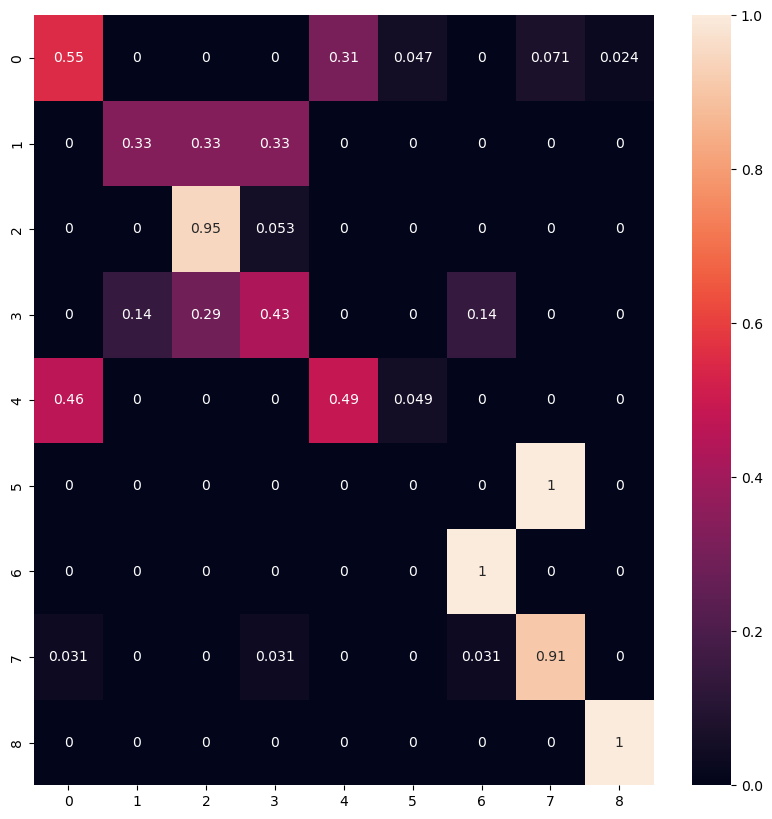

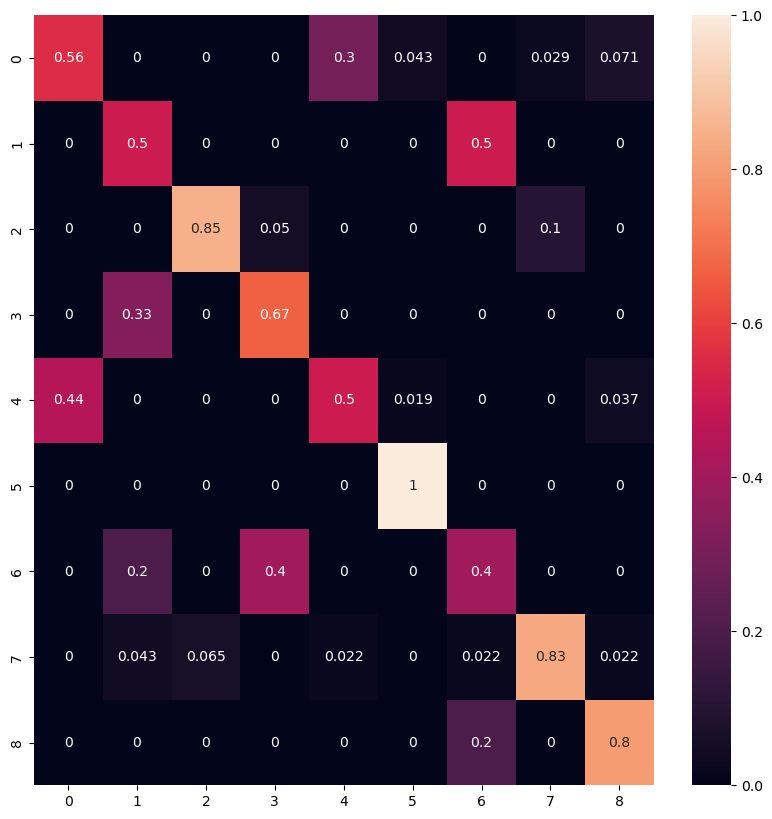

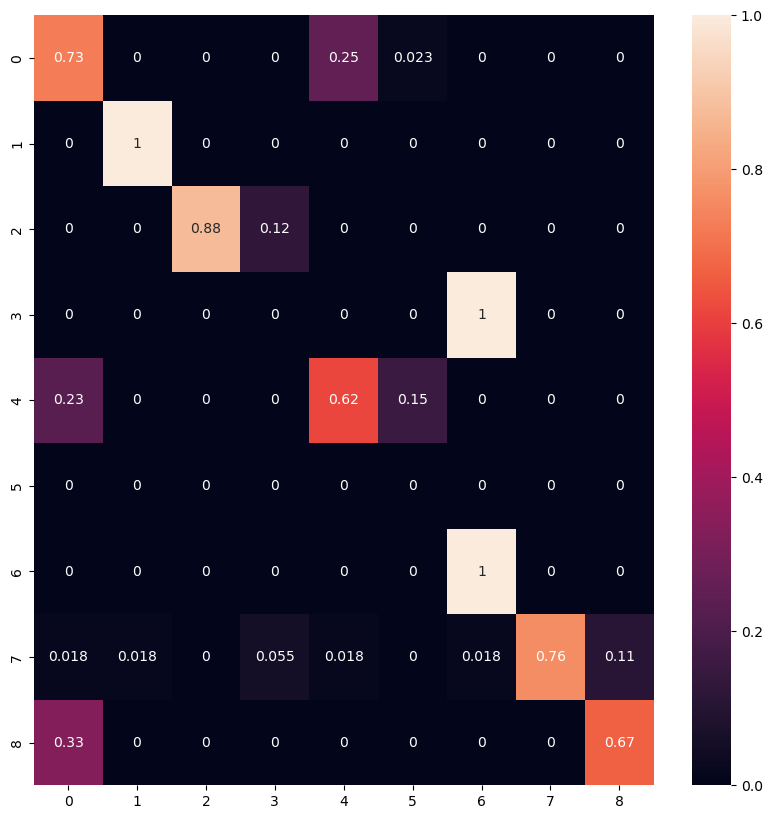

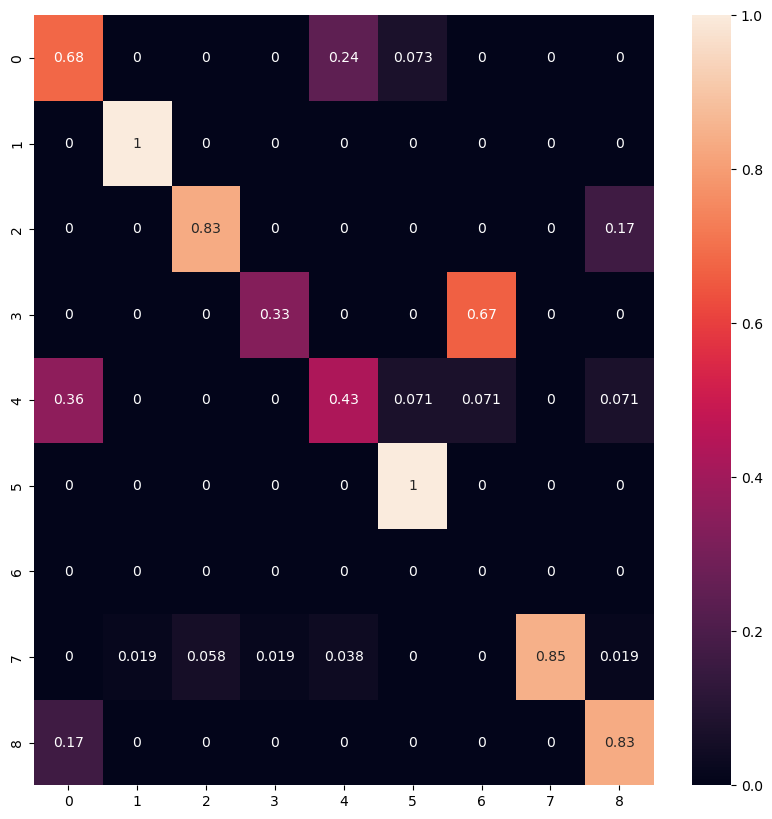

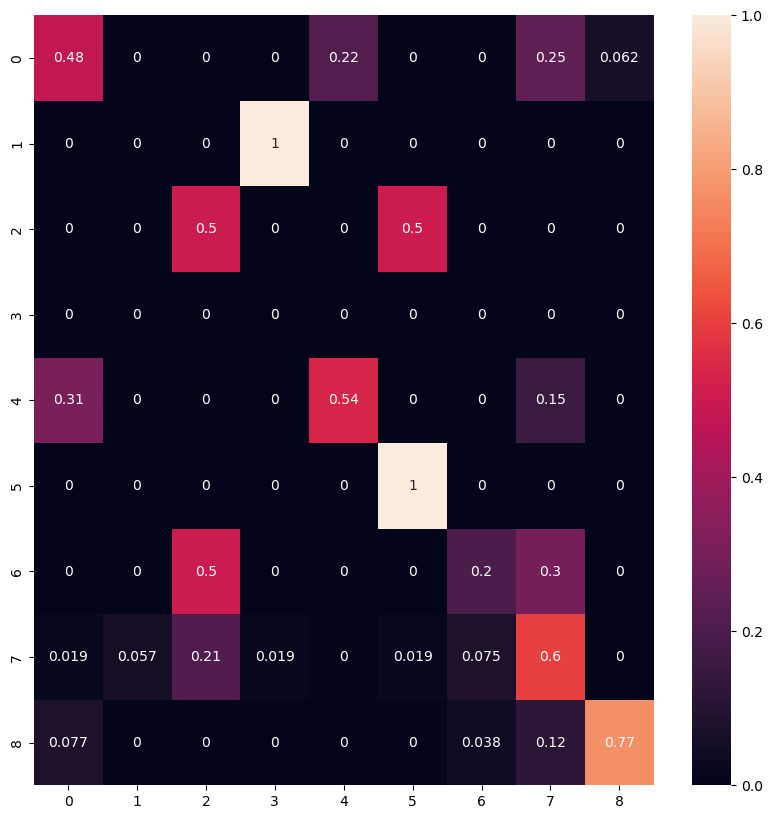

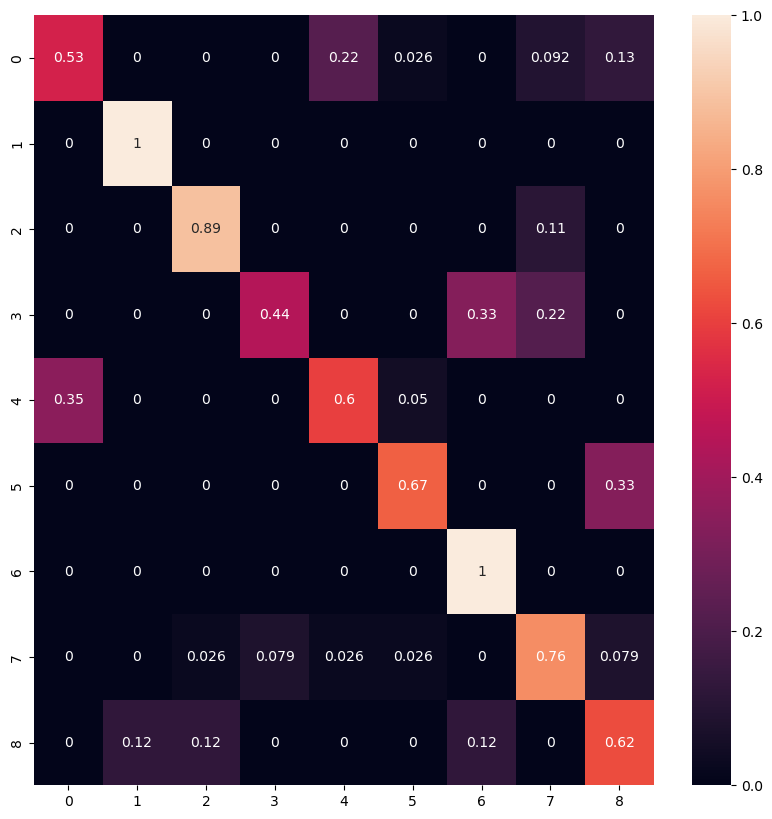

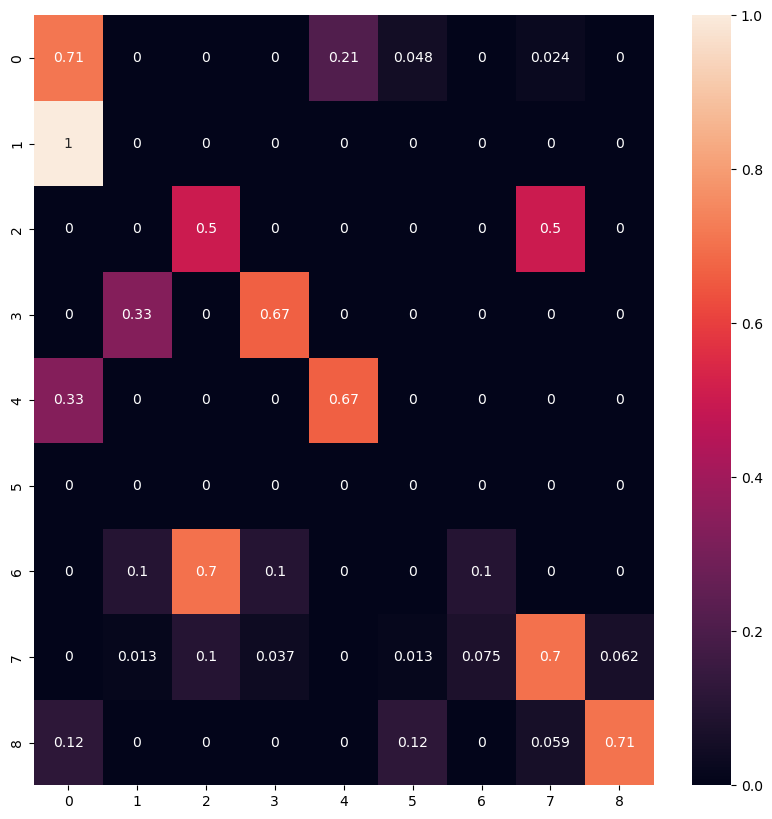

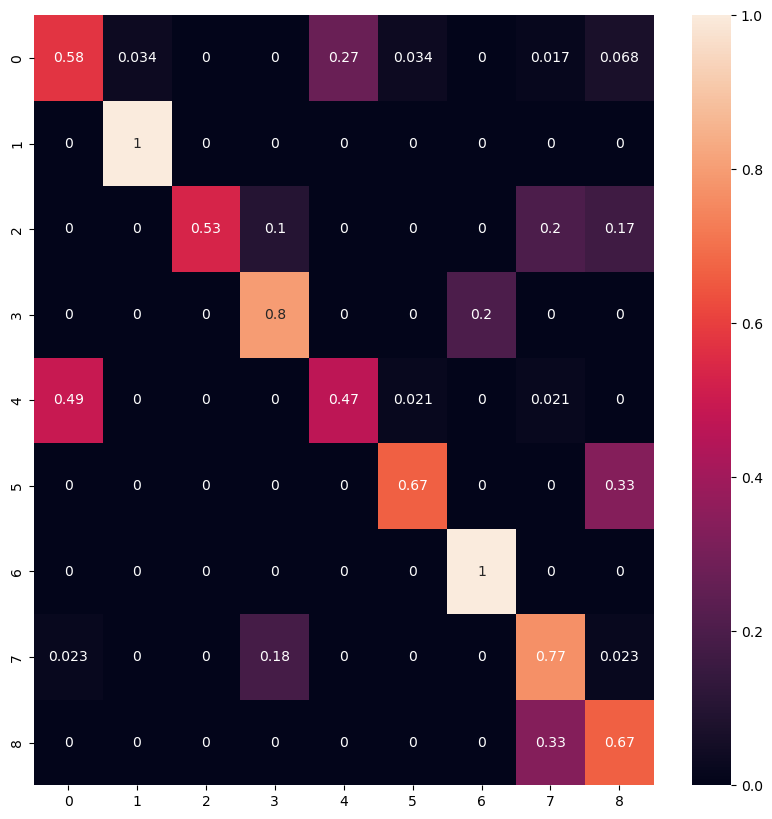

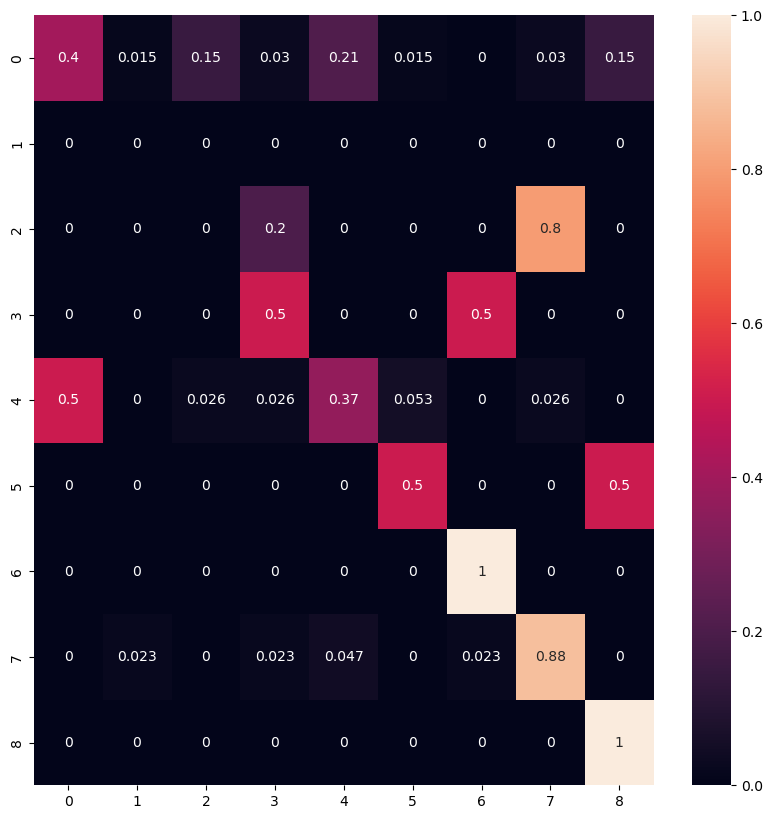

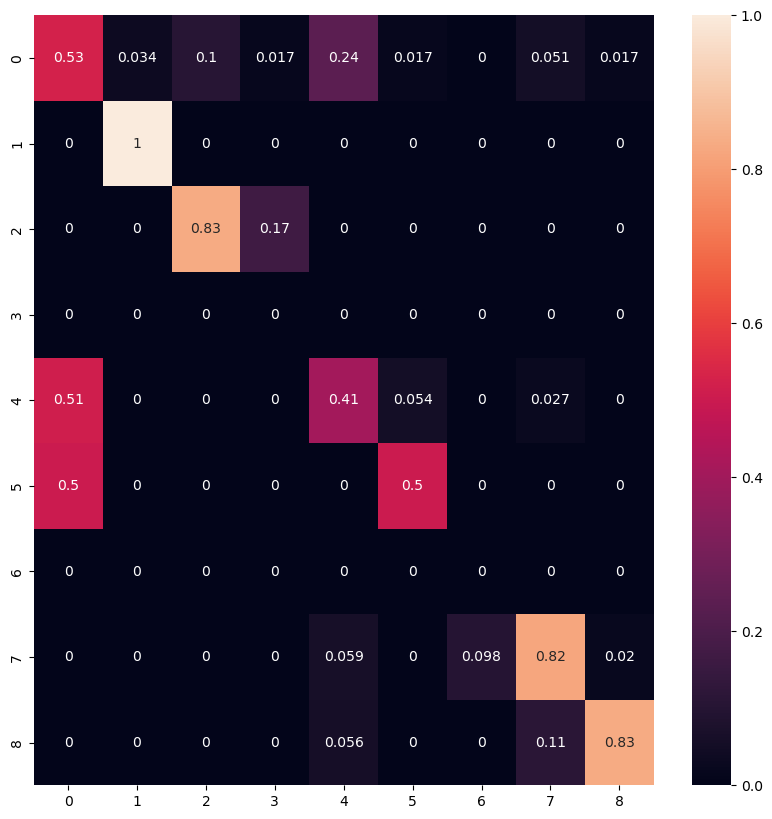

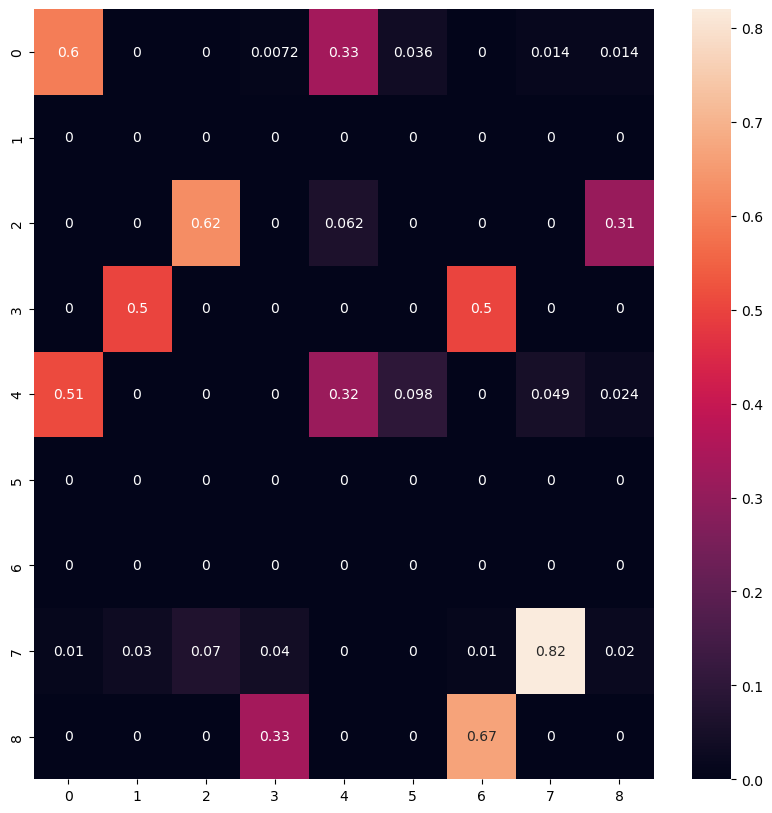

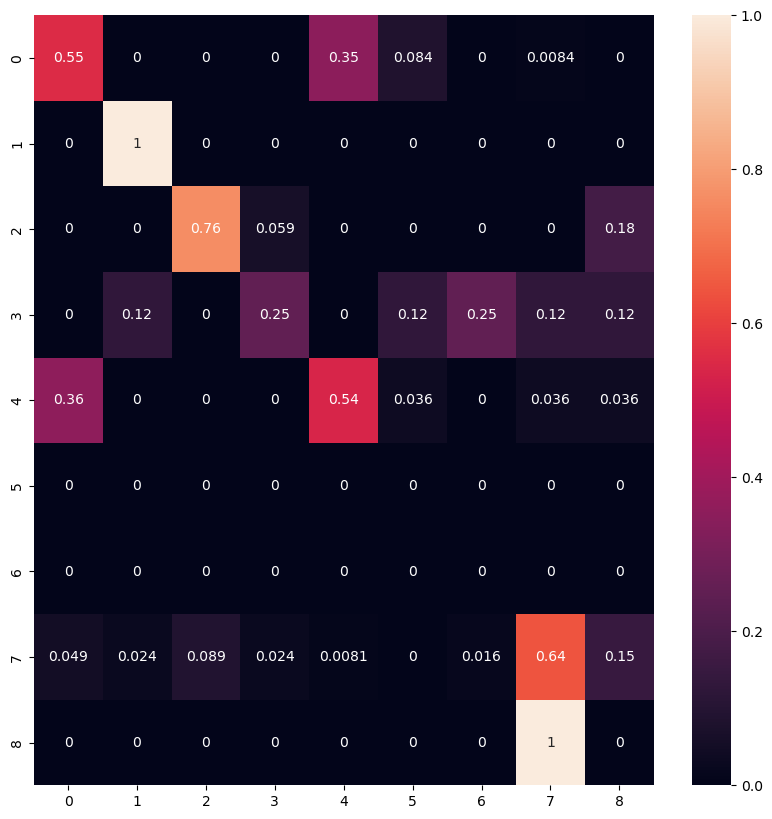

In [34]:
test_set=os.listdir('./test_set_df')
out_xgb=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_xgb(ID,out_xgb)
out_df_xgb=pd.DataFrame(out_xgb,columns=['ID','accuracy','weighted avg F1-score'])
out_df_xgb

In [35]:
test_set=os.listdir('./test_set_df')
test_set

['.DS_Store',
 'S08T1.csv',
 'S08T2.csv',
 'N11T1.csv',
 'N11T2.csv',
 'N06T1.csv',
 'S02T2.csv',
 'N06T2.csv',
 'S02T1.csv',
 'N02T2.csv',
 'N02T1.csv',
 'S03T1.csv',
 'S03T2.csv']

In [36]:
def output_rf(ID,out):
    test=pd.read_csv(f'./test_set_df/{ID}')
    X_test=test.drop(["label","previous_label"],axis=1)
#     X_test=X_test[feature_score.nlargest(300,columns="F_Score")['Input_Features'].values]
    y_test=test['label']
    filename = './model/smote_HGBC_model2.sav'
    xgbcl=joblib.load(filename)
    # xgbcl=joblib.load(filename)
    pred=xgbcl.predict(X_test)
    acc= metrics.accuracy_score(pred,y_test)
    f1s=metrics.f1_score(pred,y_test,average='weighted')
    ax,fig=plt.subplots(figsize=(10,10))
    conf=metrics.confusion_matrix(pred,y_test, normalize='true')
    sns.heatmap(conf,annot=True)
    plt.savefig(f"./image/rf_no_gan/confusion_matrix_{ID[:5]}.png")
    return out.append([ID[:5],acc,f1s])

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.637917,0.669997
std,0.061692,0.063624
min,0.506173,0.537112
25%,0.625392,0.645966
50%,0.645850,0.677139
75%,0.661175,0.697909
max,0.758065,0.780022


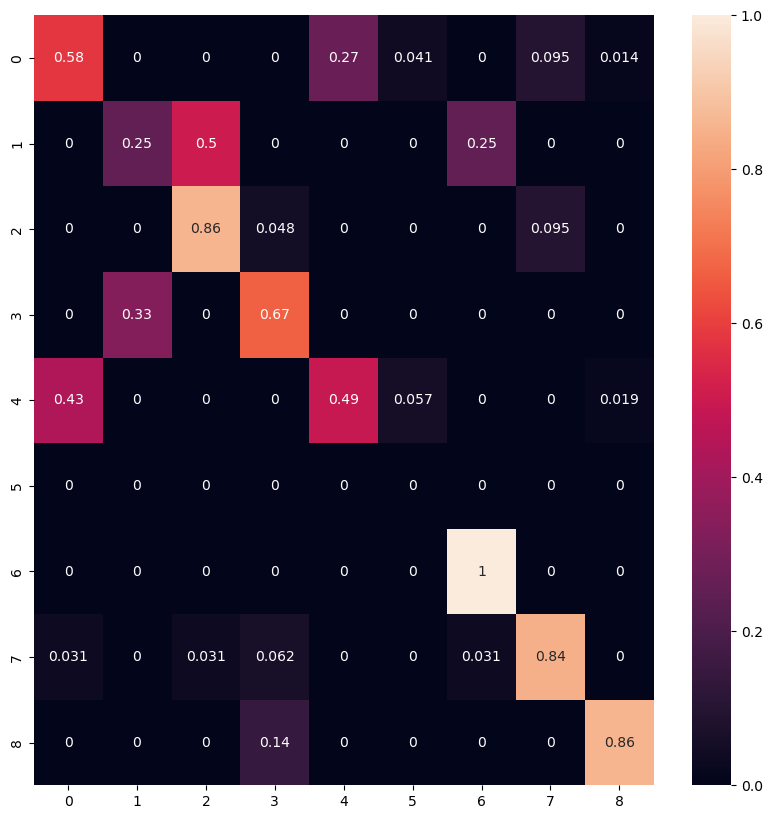

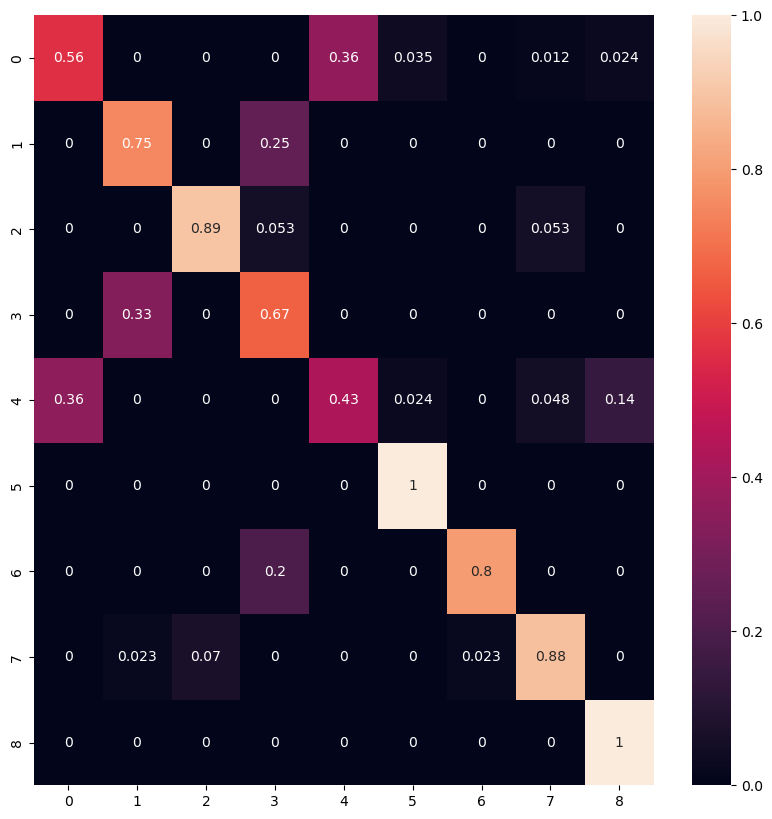

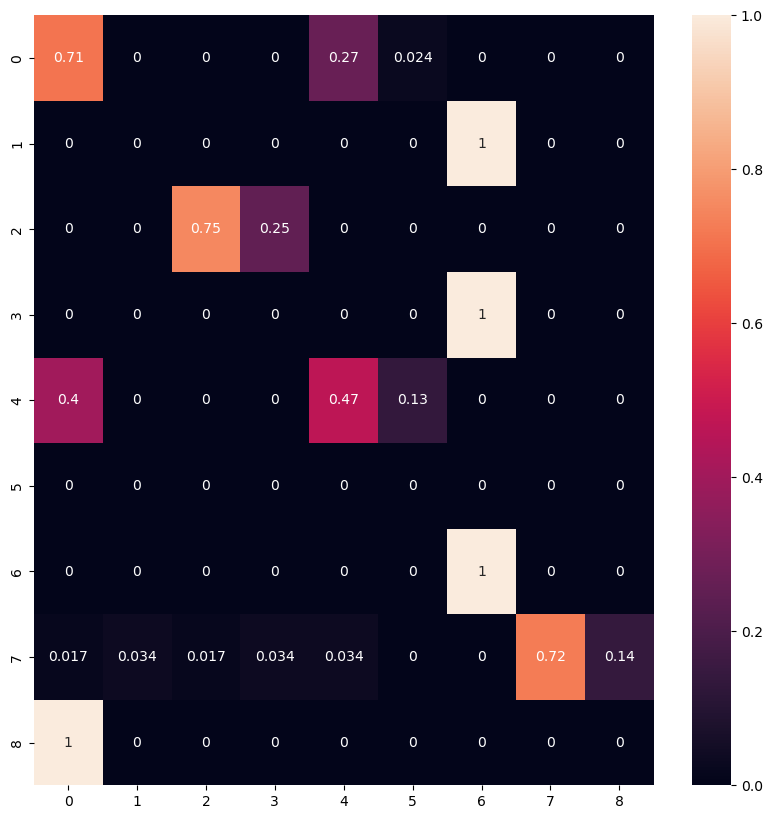

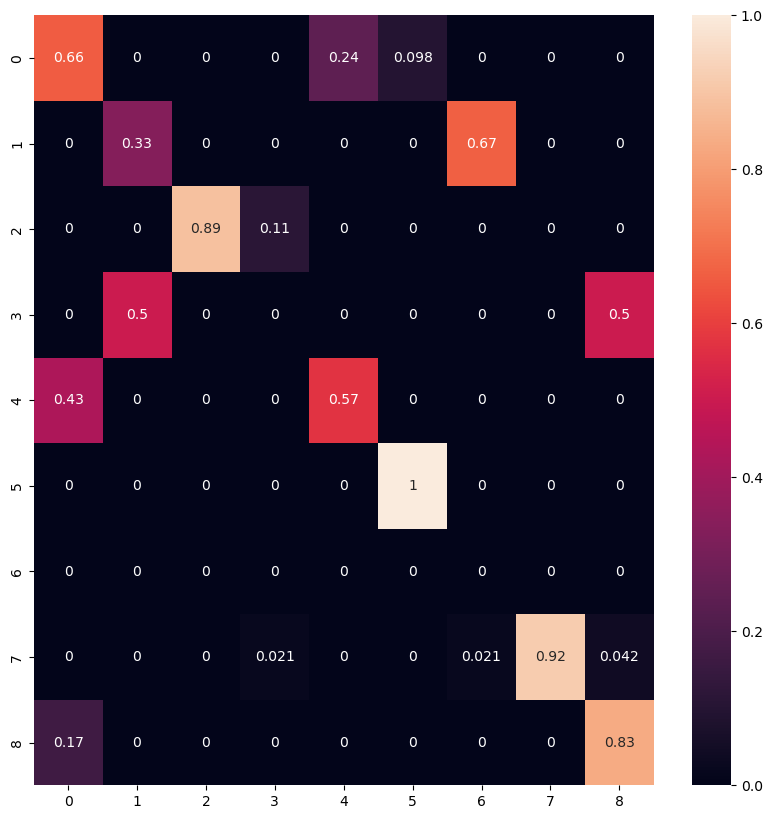

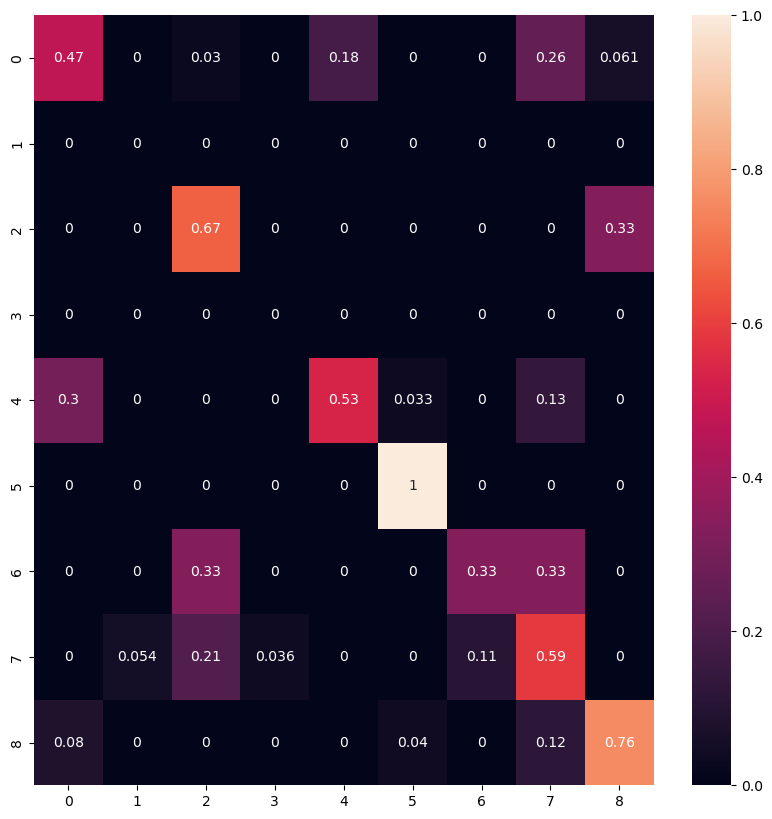

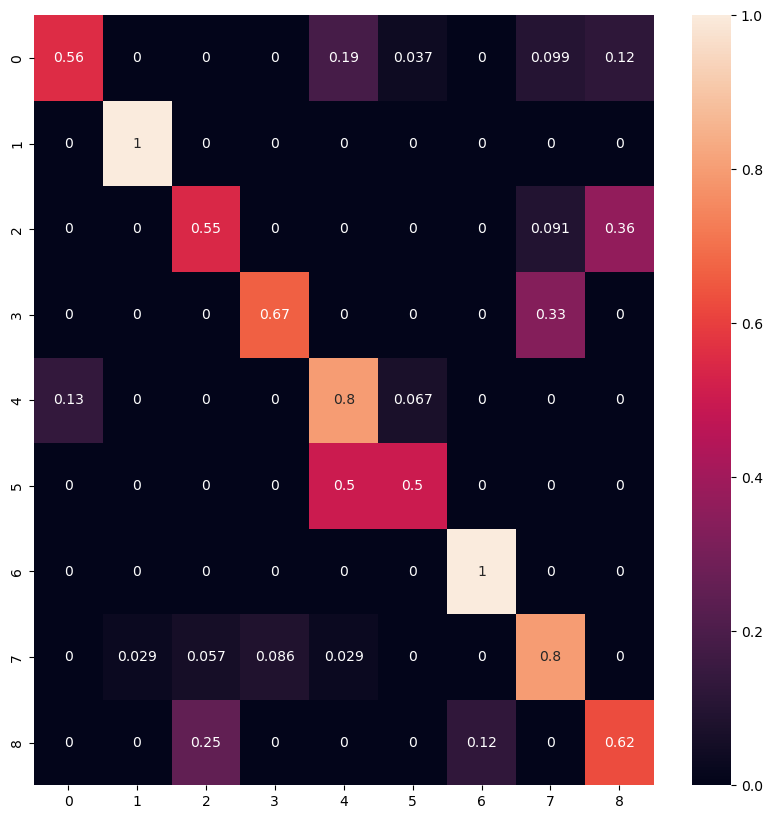

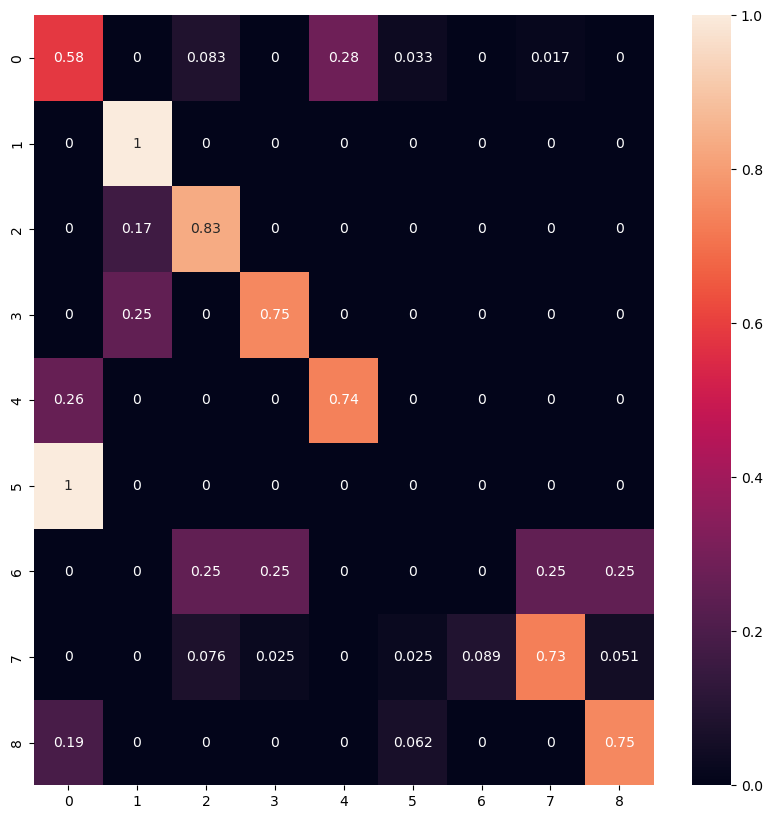

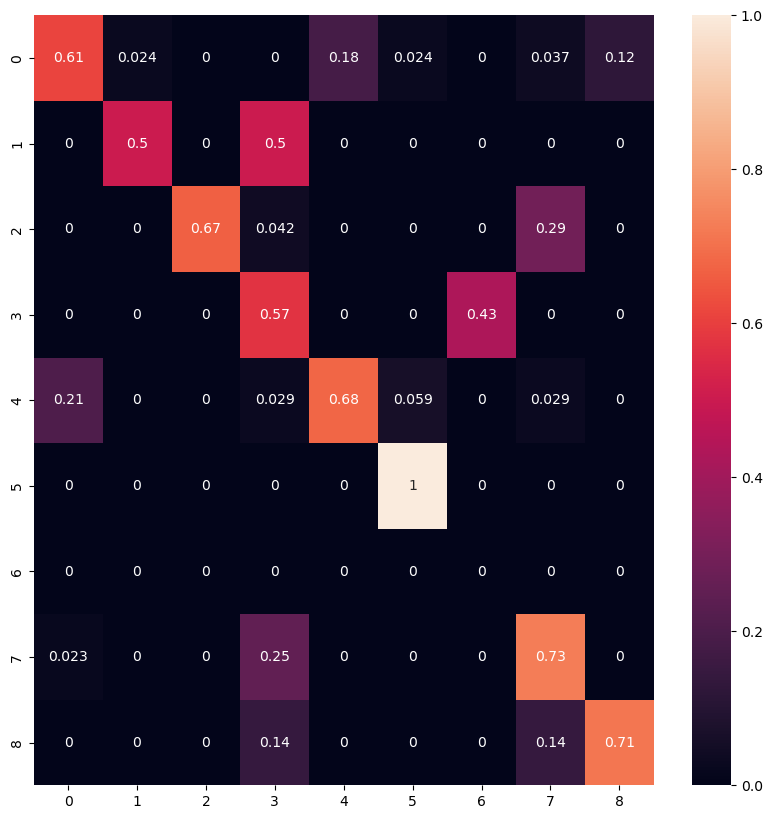

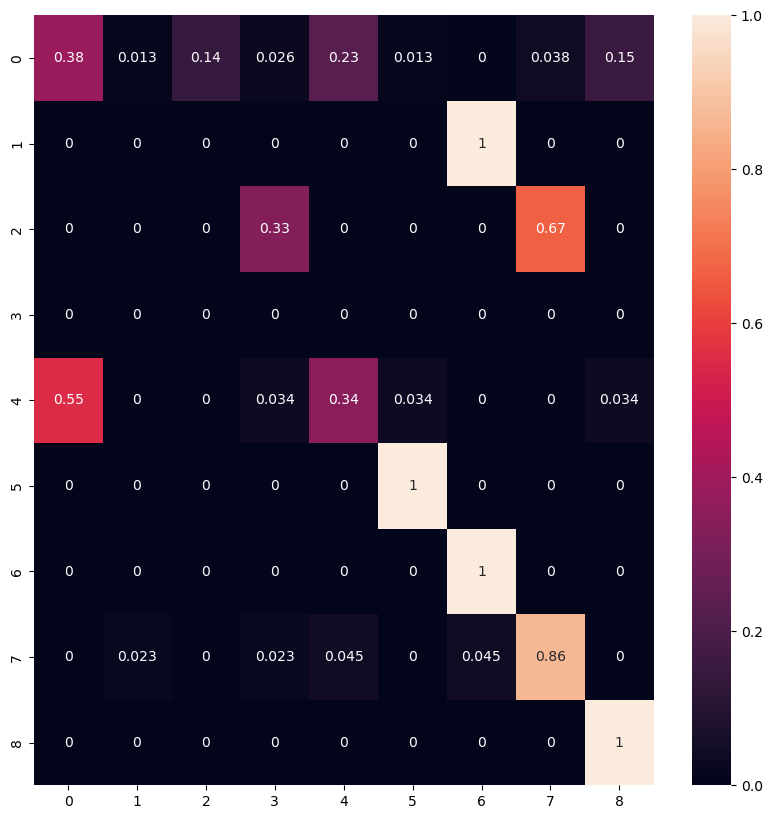

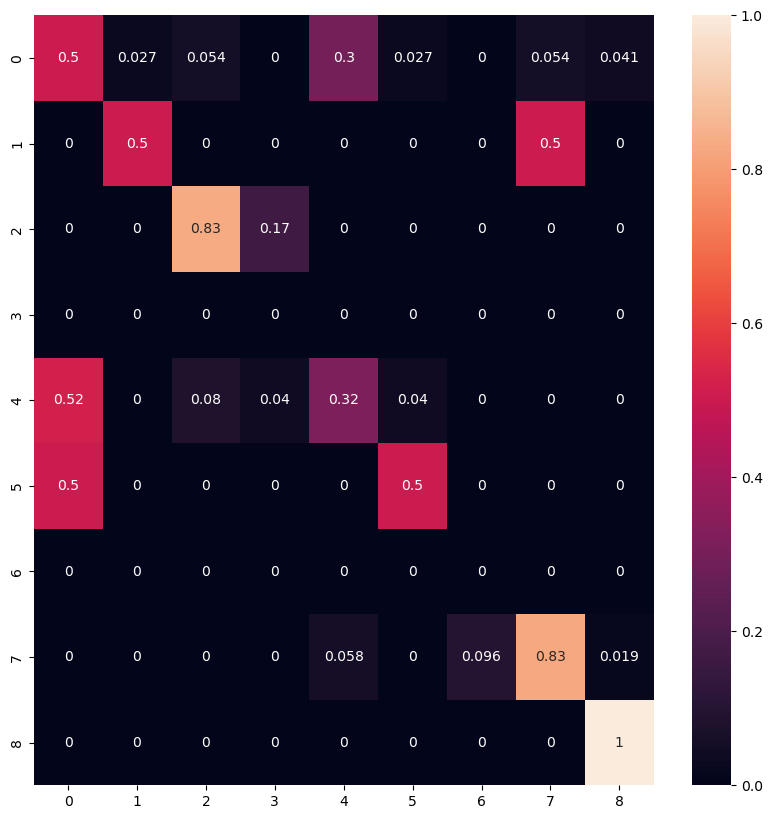

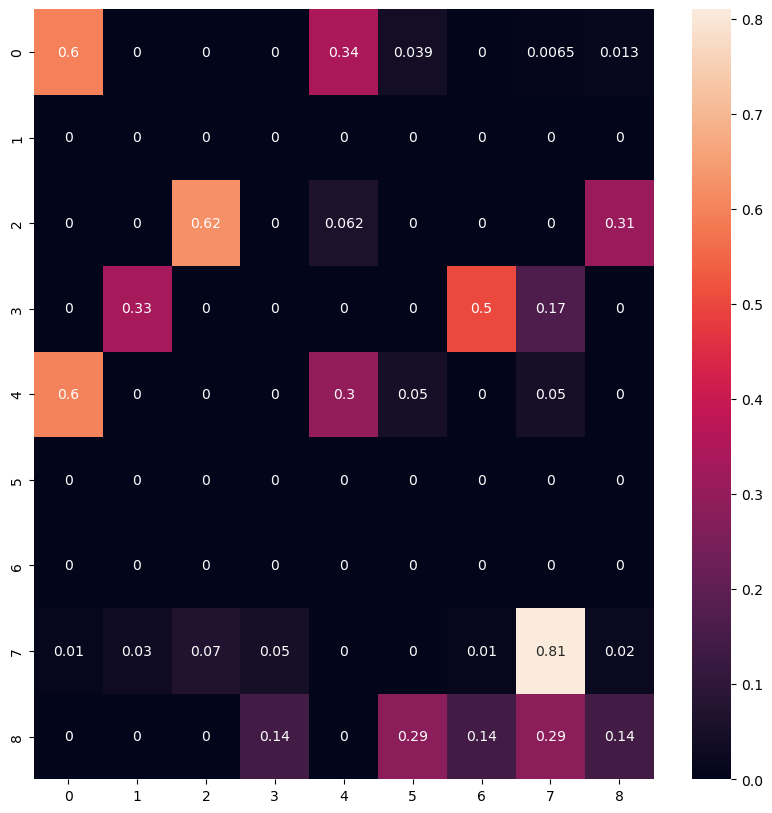

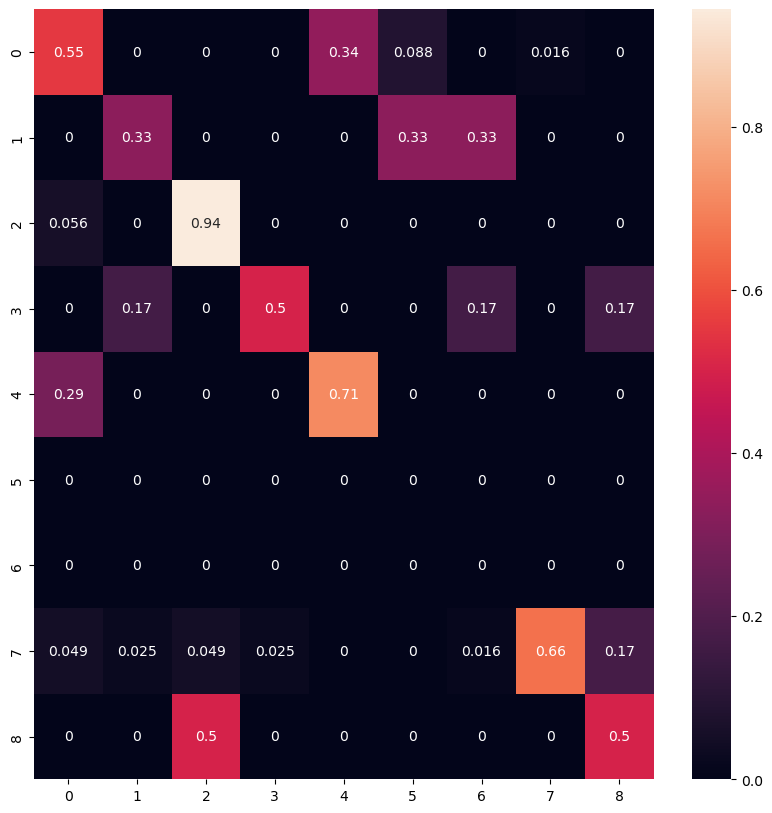

In [37]:
test_set=os.listdir('./test_set_df')
out_rf=[]
for ID in test_set:
    if ID.endswith(".csv"):
        output_rf(ID,out_rf)
out_df=pd.DataFrame(out_rf,columns=['ID','accuracy','weighted avg F1-score'])
out_df.describe()

In [38]:
out_df.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.637917,0.669997
std,0.061692,0.063624
min,0.506173,0.537112
25%,0.625392,0.645966
50%,0.645850,0.677139
75%,0.661175,0.697909
max,0.758065,0.780022


In [39]:
out_df_xgb.describe()

,accuracy,weighted avg F1-score
count,12.000000,12.000000
mean,0.630514,0.656589
std,0.061942,0.066959
min,0.530864,0.545432
25%,0.603372,0.631378
50%,0.626437,0.648806
75%,0.650655,0.677925
max,0.738095,0.781124
